In [1]:
import cv2
from tflite_support.task import core
from tflite_support.task import processor
from tflite_support.task import vision
import utils
import time
import numpy as np

# from matplotlib import pyplot as plt
# %matplotlib inline


In [2]:
model = 'efficientdet_lite0.tflite'
width = 640
height = 480
threads = 3
enableTPU = False

## Loading Model

In [12]:
labels = ['stop sign']#, 'traffic cone', 'traffic light']
base_options = core.BaseOptions(
      file_name=model, use_coral=enableTPU, num_threads=threads)
detection_options = processor.DetectionOptions(
      max_results=3, score_threshold=0.4, category_name_allowlist=labels)
options = vision.ObjectDetectorOptions(
      base_options=base_options, detection_options=detection_options)
detector = vision.ObjectDetector.create_from_options(options)

In [1]:
import cv2
from tflite_support.task import core
from tflite_support.task import processor
from tflite_support.task import vision
import utils
import time
import numpy as np


In [2]:
import threading
from collections import deque

labels = ['stop sign', 'traffic cone', 'traffic light']
model = 'efficientdet_lite0.tflite'
width = 480
height = 360
threads = 1
enableTPU = False

class camThread(threading.Thread):
    def __init__(self):
        super().__init__()
        base_options = core.BaseOptions(
              file_name=model, use_coral=enableTPU, num_threads=threads)
        detection_options = processor.DetectionOptions(
              max_results=3, score_threshold=0.4, category_name_allowlist=labels)
        options = vision.ObjectDetectorOptions(
              base_options=base_options, detection_options=detection_options)
        self.detector = vision.ObjectDetector.create_from_options(options)
        self.cap = None
        self.start_cam()
        self.q = deque(maxlen=10)#thread safe queue
        
    def start_cam(self):
        self.cap = cv2.VideoCapture(0)
        self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)
        self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 360)
    
    def get_detects(self):
        try:
            success, image = self.cap.read()
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            input_tensor = vision.TensorImage.create_from_array(rgb_image)
            detection_result = detector.detect(input_tensor)
            detects = [d.categories[0].category_name for d in detection_result.detections]
            self.q.append(detects)
            print(self.q)
        except Exception as e:
            raise(e)
        
    def end_cam(self):
        self.cap.release()
        
    def run(self):
        try:
            while True:
                if not self.cap.isOpened():
                    break
                self.get_detects()
        except Exception as e:
            raise(e)
        

In [3]:
cam = camThread()

In [4]:
cam.start()

In [5]:
print(cam.q)

In [6]:
cam.end_cam()
cam.join()

In [7]:
(cam.cap.isOpened())

## Taking a picture

In [19]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 360)

timers = []

start = time.time()
for i in range(1):
    timer = []
    i1 = time.time()
    success, image = cap.read()
    i2 = time.time()
    timer.append(i2-i1)
#     image = cv2.flip(image, 1)
    i3 = time.time()
    timer.append(i3-i2)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    i4 = time.time()
    timer.append(i4-i3)
    input_tensor = vision.TensorImage.create_from_array(rgb_image)
    i5 = time.time()
    timer.append(i5-i4)
    detection_result = detector.detect(input_tensor)
    i6 = time.time()
    timer.append(i6-i5)
    detects = [d.categories[0].category_name for d in detection_result.detections]
    timers.append(np.array(timer))
    
end = time.time()
# cap.release()

In [12]:
# print("image capturing time:", np.array(timers).T[0].mean())
# print("image flipping time:", np.array(timers).T[1].mean())
# print("image converting time:", np.array(timers).T[2].mean())
# print("image tensoring time:", np.array(timers).T[3].mean())
# print("image predicting time:", np.array(timers).T[4].mean())

In [ ]:
# print("image capturing time:", np.array(timers).T[0].mean())
# print("image flipping time:", np.array(timers).T[1].mean())
# print("image converting time:", np.array(timers).T[2].mean())
# print("image tensoring time:", np.array(timers).T[3].mean())
# print("image predicting time:", np.array(timers).T[4].mean())

In [7]:
fps = 50/(end-start)
fps


4.88467551009133

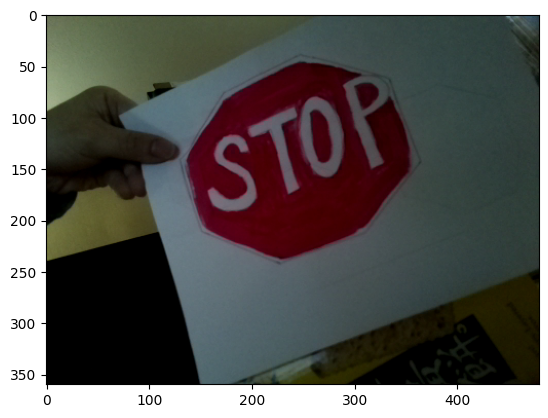

In [15]:
plt.imshow(rgb_image)
plt.show()

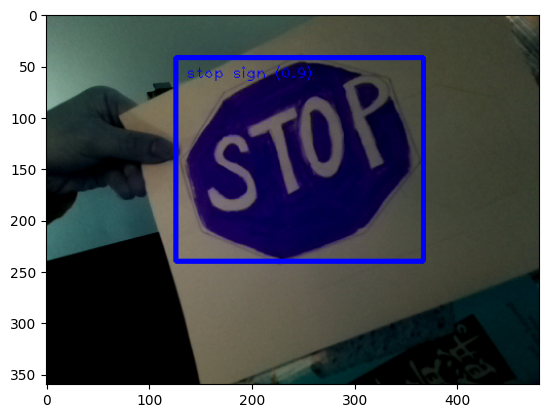

In [16]:
# Run object detection estimation using the model.
detection_result = detector.detect(input_tensor)

# Draw keypoints and edges on input image
image = utils.visualize(image, detection_result)

plt.imshow(image)
plt.show()

In [17]:
detection_result.detections[0].categories[0].category_name

'stop sign'

In [131]:
detection_result

DetectionResult(detections=[])